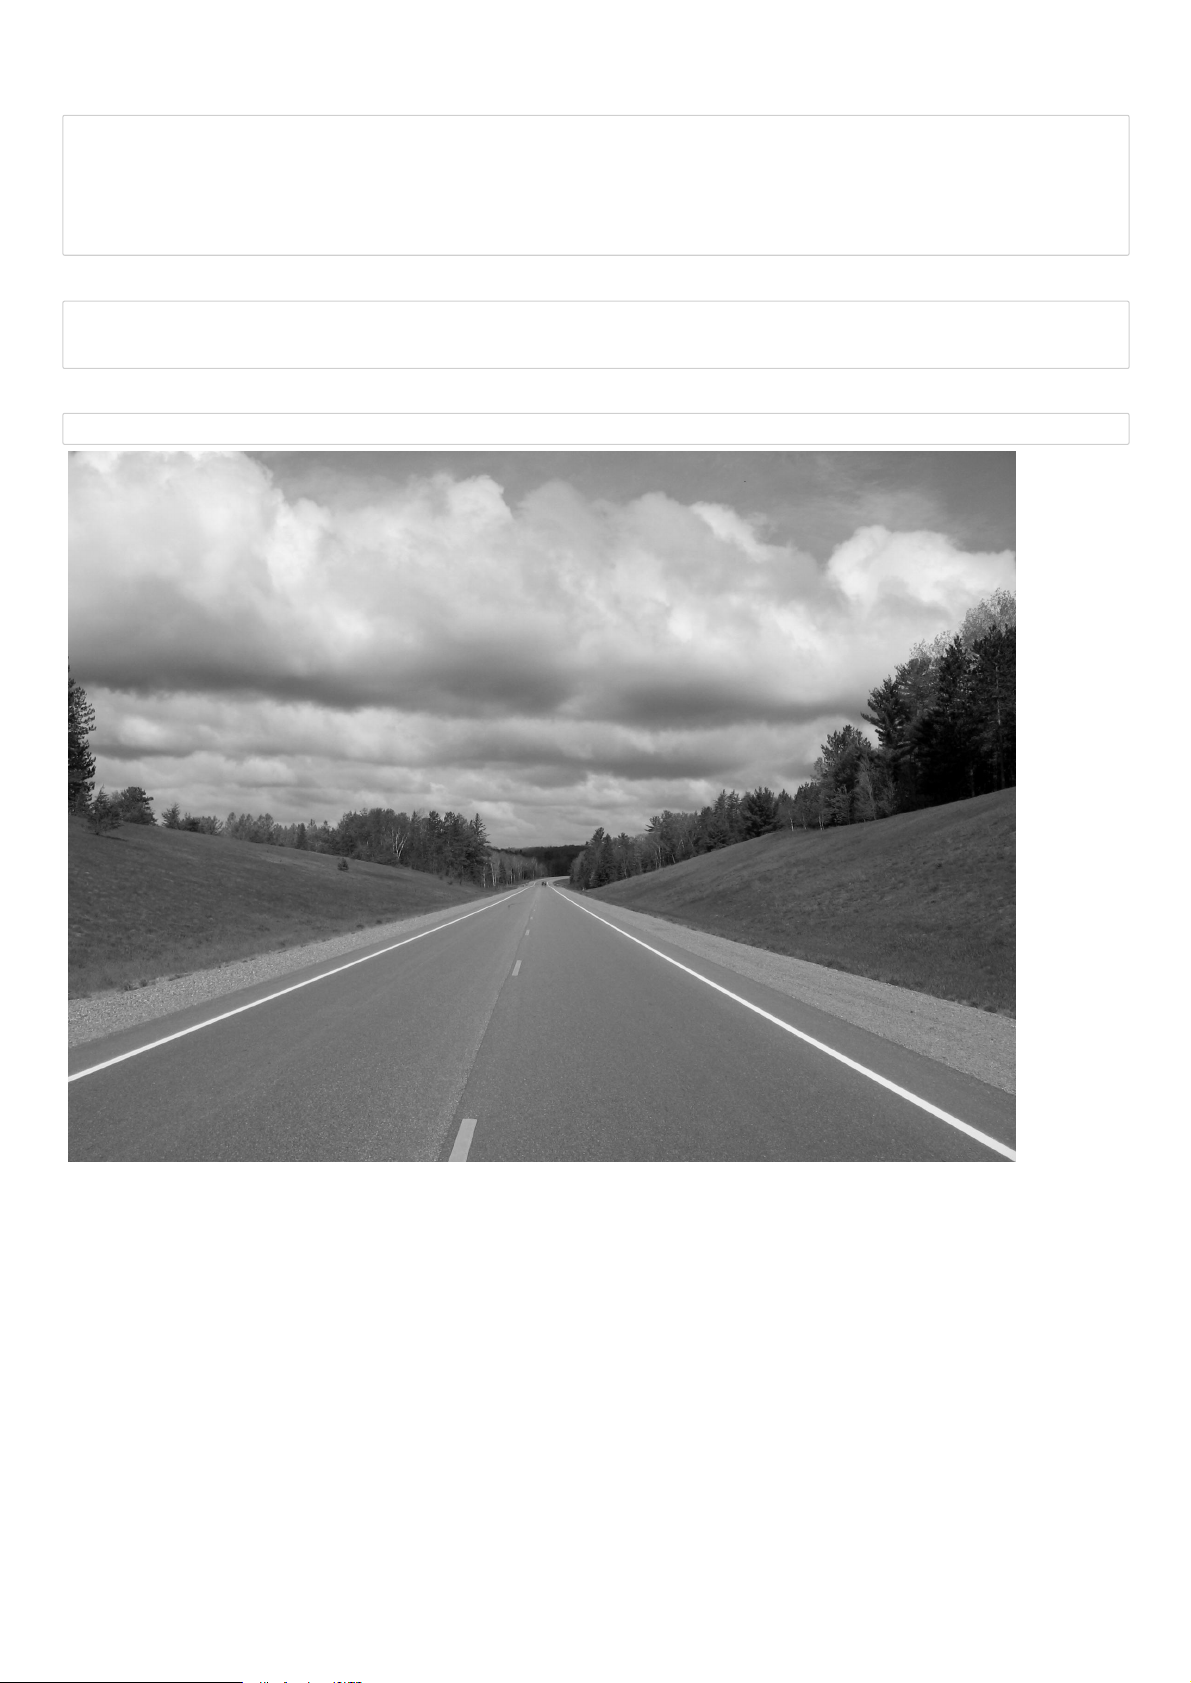

30/01/2023, 00:13

MS2022504_Laxminarayen_1a - Jupyter Notebook

localhost:8889/notebooks/Downloads/MS2022504_Laxminarayen_1a.ipynb

1/6

In\[1\]:

In\[2\]:

In\[3\]:

#Loading Libraries

import<span class="ff2 fc0 ws2"> sys</span>

import<span class="ff2 fc0 ws2"> math</span>

import<span class="ff2 fc0 ws2"> cv2</span>

import<span class="ff2 fc0 ws2"> numpy </span>as<span
class="ff2 fc0 ws2"> np</span>

from<span class="ff2 fc0 ws2"> matplotlib </span>import<span
class="ff2 fc0 ws2"> pyplot </span>as<span class="ff2 fc0 ws2">
plt</span>

from<span class="ff2 fc0 ws2"> google.colab.patches </span>import<span
class="ff2 fc0 ws2"> cv2_imshow <span class="ff3 fc2">#Google Colab
handler for imshow</span></span>

\# Loads an image

src1 <span class="ff4 fc4 ls0">=</span> cv2.imread(<span
class="fc5 ws1">'Road8.jpeg'</span>)

grayscale <span class="ff4 fc4 ls0">=</span> cv2.cvtColor(src1,
cv2.COLOR_BGR2GRAY)

cv2_imshow(grayscale)

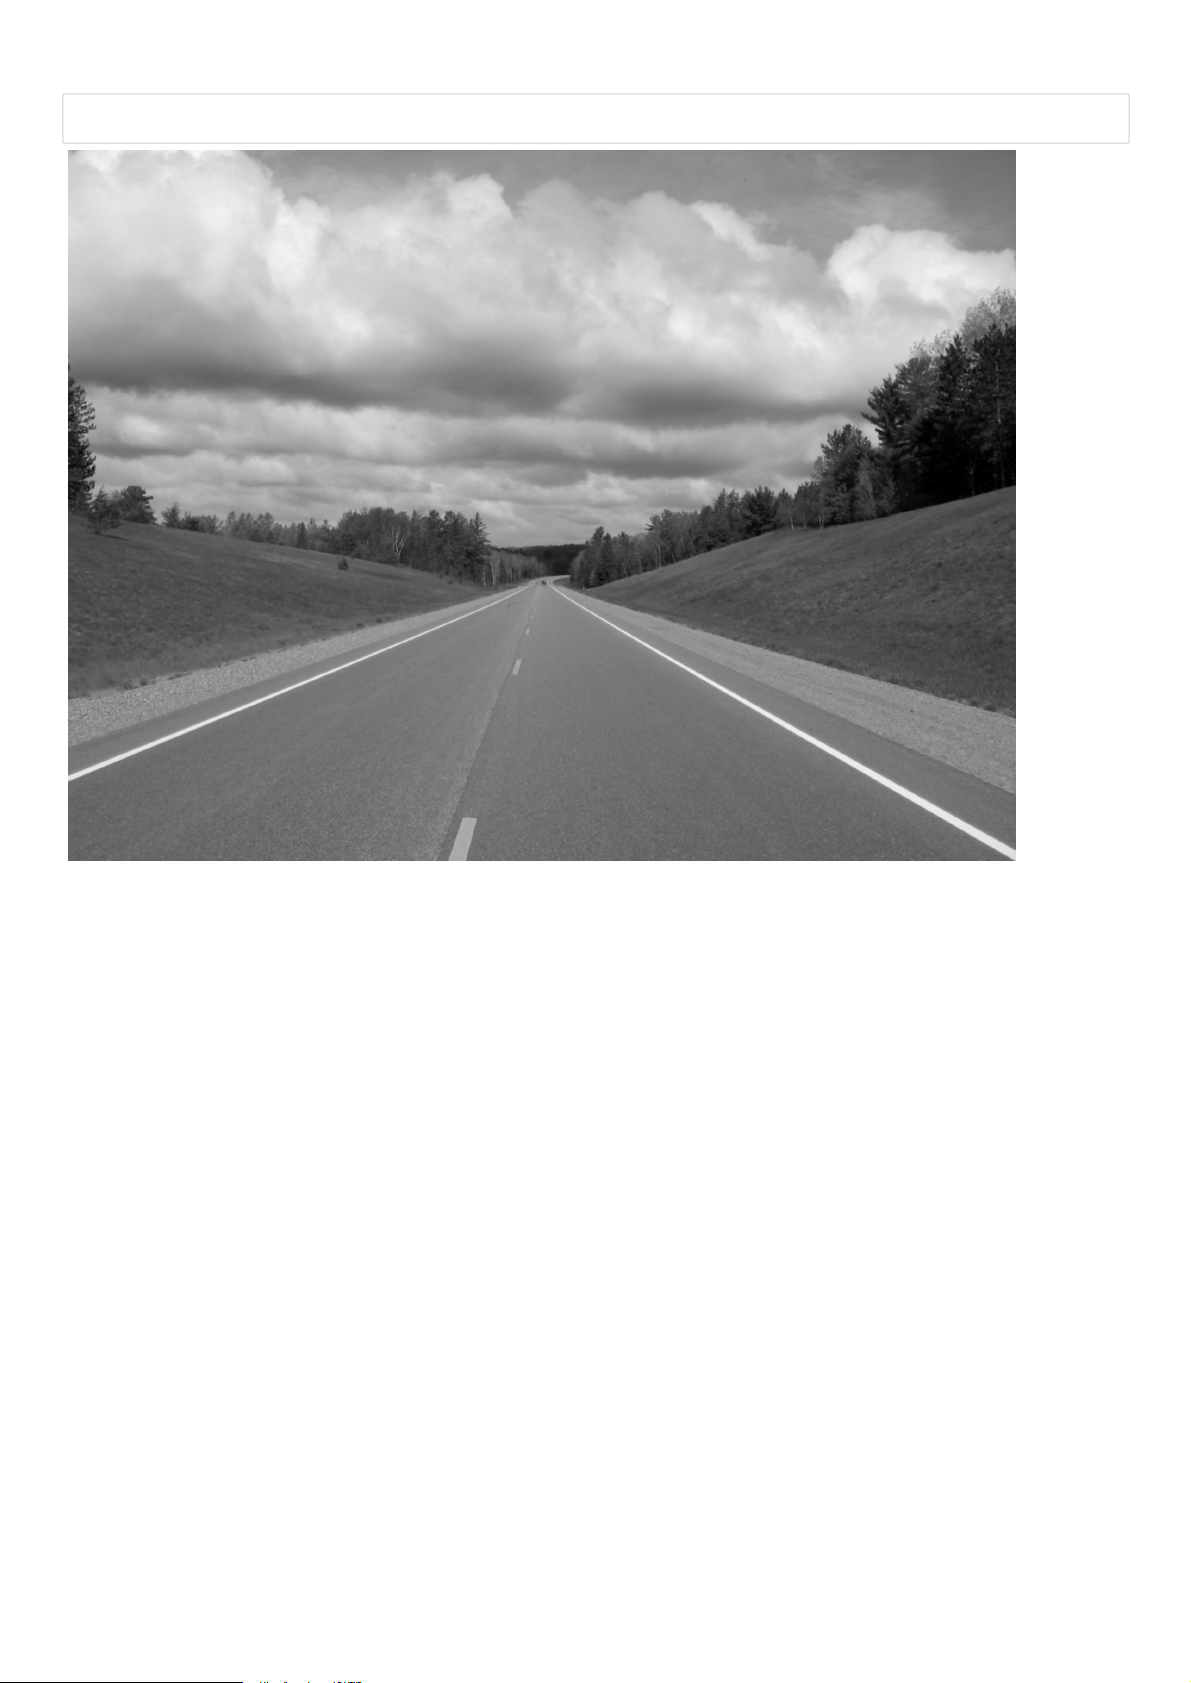

30/01/2023, 00:13

MS2022504_Laxminarayen_1a - Jupyter Notebook

localhost:8889/notebooks/Downloads/MS2022504_Laxminarayen_1a.ipynb

2/6

In\[4\]:

blur <span class="ff4 fc4 ls0">=</span>
cv2.GaussianBlur(grayscale,(<span class="fc6 ls0">5</span>, <span
class="fc6 ls0">5</span>), <span class="fc6 ls0">0</span>)

cv2_imshow(blur)

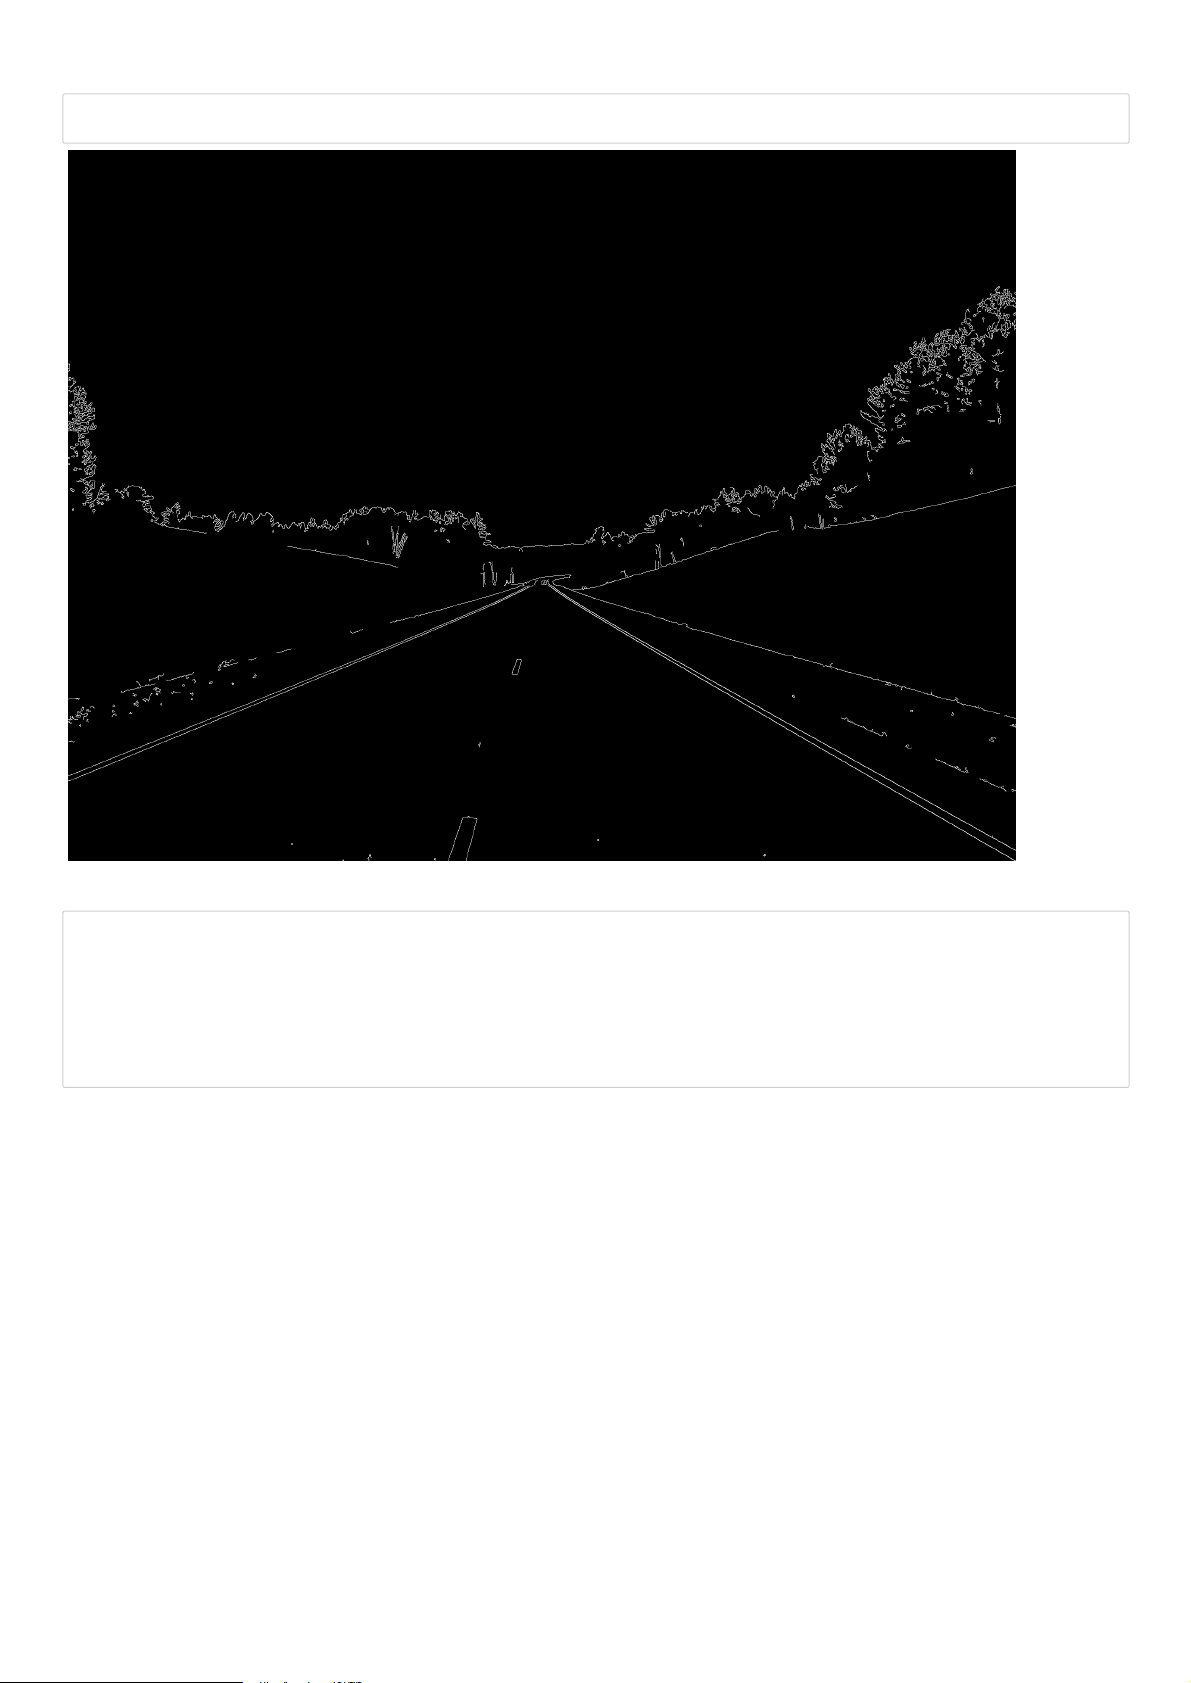

30/01/2023, 00:13

MS2022504_Laxminarayen_1a - Jupyter Notebook

localhost:8889/notebooks/Downloads/MS2022504_Laxminarayen_1a.ipynb

3/6

In\[5\]:

In\[14\]:

canny <span class="ff4 fc4 ls0">=</span> cv2.Canny(blur, <span
class="fc6 ws1">50</span>, <span class="fc6 ws1">150</span>)

cv2_imshow(canny)

def<span class="ff2 fc0 ls0 ws2"> </span><span
class="ff2 fc7">region_of_interest<span
class="fc0">(canny):</span></span>

height <span class="ff4 fc4 ls0">=</span> canny.shape\[<span
class="fc6 ls0">0</span>\]

width <span class="ff4 fc4 ls0">=</span> canny.shape\[<span
class="fc6 ls0">1</span>\]

<span class="ff3 fc2">#mask = np.zeros_like(canny)</span>

triangle <span class="ff4 fc4 ls0">=</span> np.array(\[\[(<span
class="ff4 fc4 ls0">-</span><span class="fc6 ws1">1000</span>,
height),(<span class="fc6 ws1">2100</span>, height),(<span
class="fc6 ws1">1100</span>, <span class="fc6 ws1">950</span>),\]\],
np.int32)

mask <span class="ff4 fc4 ls0">=</span> np.zeros_like(canny)

cv2.fillPoly(mask, triangle, <span class="fc6 ws1">255</span>)

masked_image <span class="ff4 fc4 ls0">=</span> cv2.bitwise_and(canny,
mask)

<span class="ff4 fc3 ws1">return</span> mask,masked_image

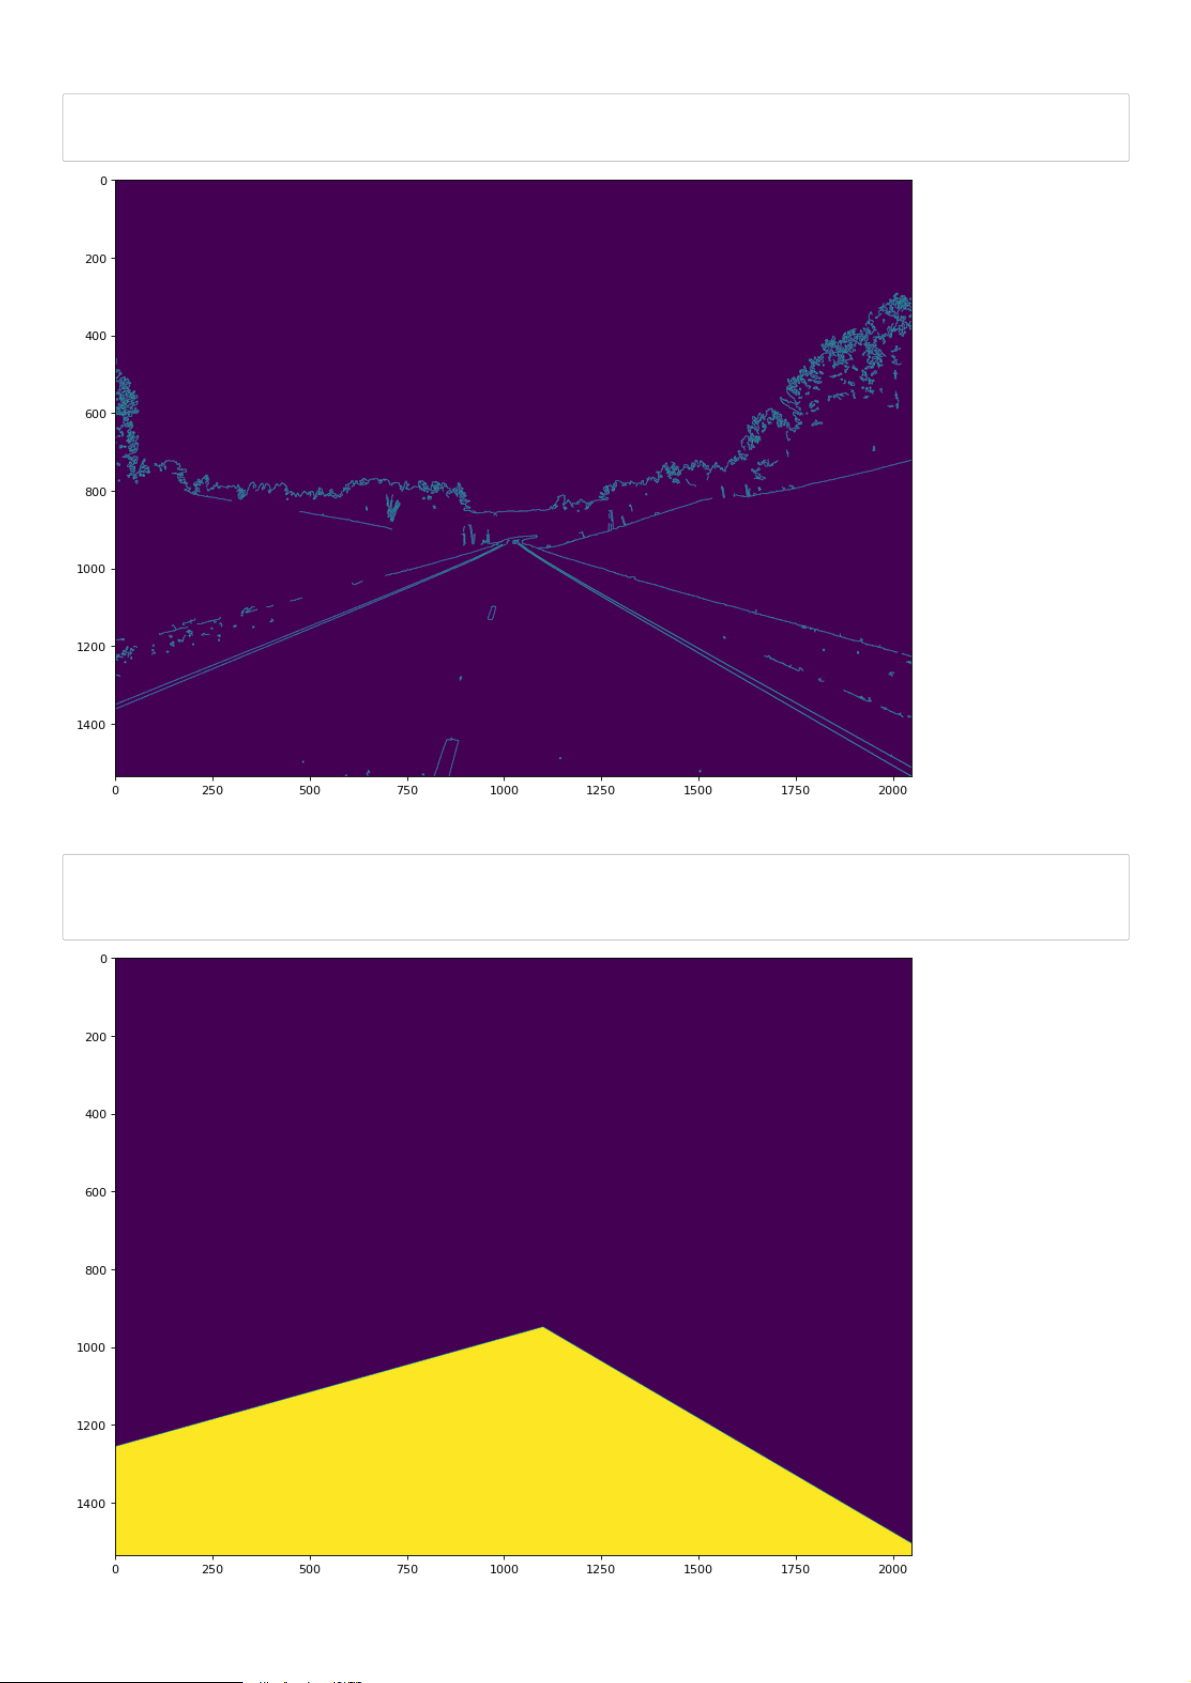

30/01/2023, 00:13

MS2022504_Laxminarayen_1a - Jupyter Notebook

localhost:8889/notebooks/Downloads/MS2022504_Laxminarayen_1a.ipynb

4/6

In\[7\]:

In\[15\]:

plt.figure(figsize<span class="ff4 fc4 ls2">=</span><span
class="ls0">(</span><span class="fc6">12</span><span class="ws2">,
</span><span class="fc6">15</span><span class="ws2">), dpi<span
class="ff4 fc4 ls0">=</span></span><span class="fc6">80</span>)

plt.imshow(canny)

plt.show()

mask,mm <span class="ff4 fc4 ls0">=</span> region_of_interest(canny)

plt.figure(figsize<span class="ff4 fc4 ls2">=</span><span
class="ls0">(</span><span class="fc6">12</span><span class="ws2">,
</span><span class="fc6">15</span><span class="ws2">), dpi<span
class="ff4 fc4 ls0">=</span></span><span class="fc6">80</span>)

plt.imshow(mask)

plt.show()

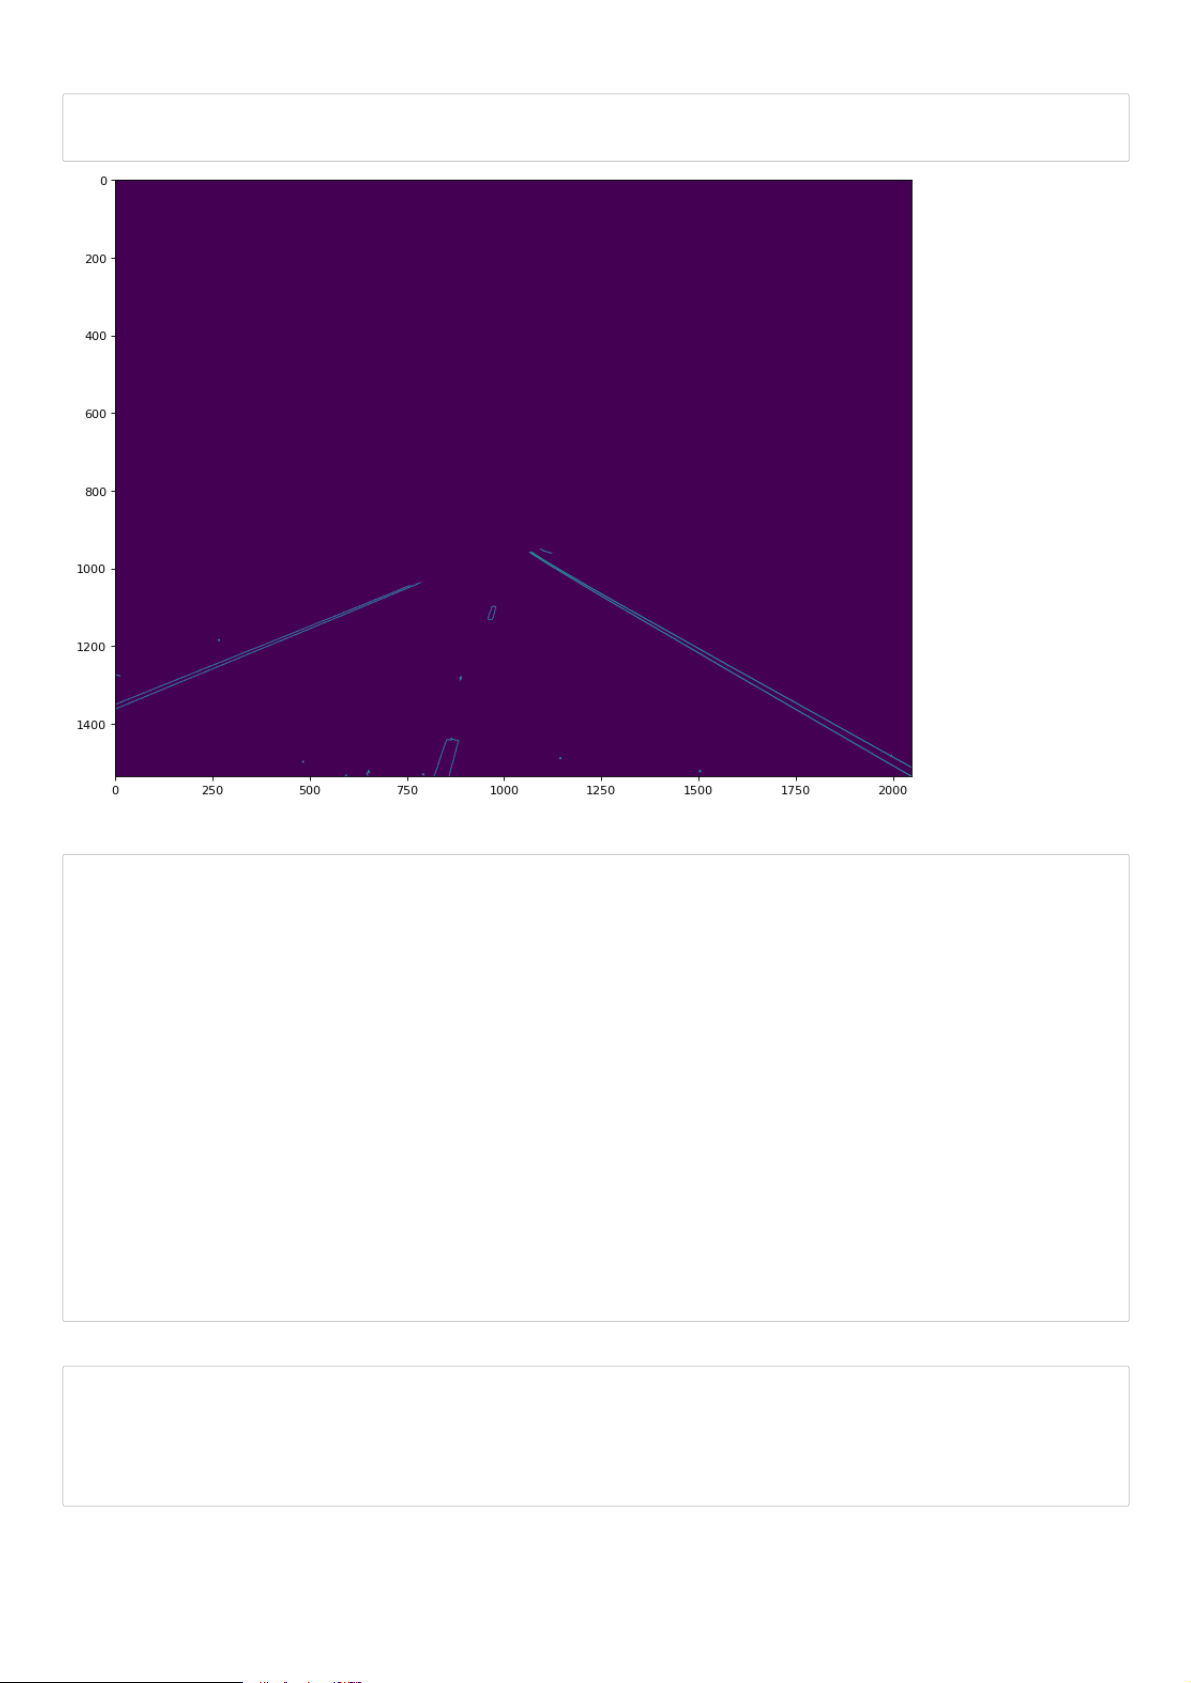

30/01/2023, 00:13

MS2022504_Laxminarayen_1a - Jupyter Notebook

localhost:8889/notebooks/Downloads/MS2022504_Laxminarayen_1a.ipynb

5/6

In\[16\]:

In\[17\]:

In\[18\]:

plt.figure(figsize<span class="ff4 fc4 ls2">=</span><span
class="ls0">(</span><span class="fc6">12</span><span class="ws2">,
</span><span class="fc6">15</span><span class="ws2">), dpi<span
class="ff4 fc4 ls0">=</span></span><span class="fc6">80</span>)

plt.imshow(mm)

plt.show()

def<span class="ff2 fc0 ls0 ws2"> </span><span
class="ff2 fc7">make_coordinates<span class="fc0 ws2">(image,
line_parameters):</span></span>

slope, intercept <span class="ff4 fc4 ls0">=</span> line_parameters

y1 <span class="ff4 fc4 ls0">=</span> image.shape\[<span
class="fc6 ls0">0</span>\]

y2 <span class="ff4 fc4 ls0">=</span><span class="ls0"> </span><span
class="fc3 ws1">int<span class="fc0">(y1<span
class="ff4 fc4 ls0">\*</span><span class="ls0">(<span class="fc6">3<span
class="ff4 fc4 ls2">/</span>5</span></span>))</span></span>

x1 <span class="ff4 fc4 ls0">=</span><span class="ls0"> </span><span
class="fc3 ws1">int</span>((y1 <span class="ff4 fc4 ls0">-</span>
intercept)<span class="ff4 fc4 ls0">/</span><span
class="ws1">slope)</span>

x2 <span class="ff4 fc4 ls0">=</span><span class="ls0"> </span><span
class="fc3 ws1">int</span>((y2 <span class="ff4 fc4 ls0">-</span>
intercept)<span class="ff4 fc4 ls0">/</span><span
class="ws1">slope)</span>

<span class="ff4 fc3 ws1">return</span> np.array(\[x1, y1, x2, y2\])

def<span class="ff2 fc0 ls0 ws2"> </span><span
class="ff2 fc7">average_slope_intercept<span class="fc0 ws2">(image,
lines):</span></span>

left_fit <span class="ff4 fc4 ls0">=</span> \[\]

right_fit <span class="ff4 fc4 ls0">=</span> \[\]

<span class="ff4 fc3 ws1">for</span> line <span
class="ff4 fc3 ws1">in</span> lines:

x1, y1, x2, y2 <span class="ff4 fc4 ls0">=</span> line.reshape(<span
class="fc6 ls0">4</span>)

parameters <span class="ff4 fc4 ls0">=</span> np.polyfit((x1, x2), (y1,
y2), <span class="fc6 ls0">1</span>)

slope <span class="ff4 fc4 ls0">=</span> parameters\[<span
class="fc6 ls0">0</span>\]

intercept <span class="ff4 fc4 ls0">=</span> parameters\[<span
class="fc6 ls0">1</span>\]

<span class="ff4 fc3 ws1">if</span> slope <span
class="ff4 fc4 ls0">\<</span><span class="ls2"> <span
class="fc6 ls0">0</span></span>:

left_fit.append((slope, intercept))

<span class="ff4 fc3 ws1">else</span>:

right_fit.append((slope, intercept))

left_fit_average <span class="ff4 fc4 ls0">=</span> np.average(left_fit,
axis<span class="ff4 fc4 ls0">=<span class="ff2 fc6">0</span></span>)

right_fit_average <span class="ff4 fc4 ls0">=</span>
np.average(right_fit, axis<span class="ff4 fc4 ls0">=<span
class="ff2 fc6">0</span></span>)

left_line <span class="ff4 fc4 ls0">=</span> make_coordinates(image,
left_fit_average)

right_line <span class="ff4 fc4 ls0">=</span> make_coordinates(image,
right_fit_average)

<span class="ff4 fc3 ws1">return</span> np.array(\[left_line,
right_line\])

def<span class="ff2 fc0 ls0 ws2"> </span><span
class="ff2 fc7">display_lines<span class="fc0 ws2">(image,
lines):</span></span>

<span class="fc8 ls1 ws1">lines_image</span> <span
class="ff4 fc4">=</span><span class="ls1"> np.zeros_like(image)</span>

<span class="ff4 fc3 ls1 ws1">if</span><span class="ls1"> lines <span
class="ff4 fc3 ws1">is</span></span> <span
class="ff4 fc3 ls1 ws1">not</span> <span
class="ff4 fc3 ls1 ws1">None</span><span class="ls1">:</span>

<span class="ff4 fc8 ws1">for</span> line <span
class="ff4 fc3 ws1">in</span> lines:

x1, y1, x2, y2 <span class="ff4 fc4 ls0">=</span> line

<span class="fc8 ws1">cv2</span>.line(lines_image, (x1, y1), (x2, y2),
(<span class="fc6 ws1">255</span>, <span class="fc6 ls0">0</span>, <span
class="fc6 ls0">0</span>), <span class="fc6 ws1">10</span>)

<span class="ff4 fc8 ls1 ws1">return</span><span class="ls1">
lines_image</span>

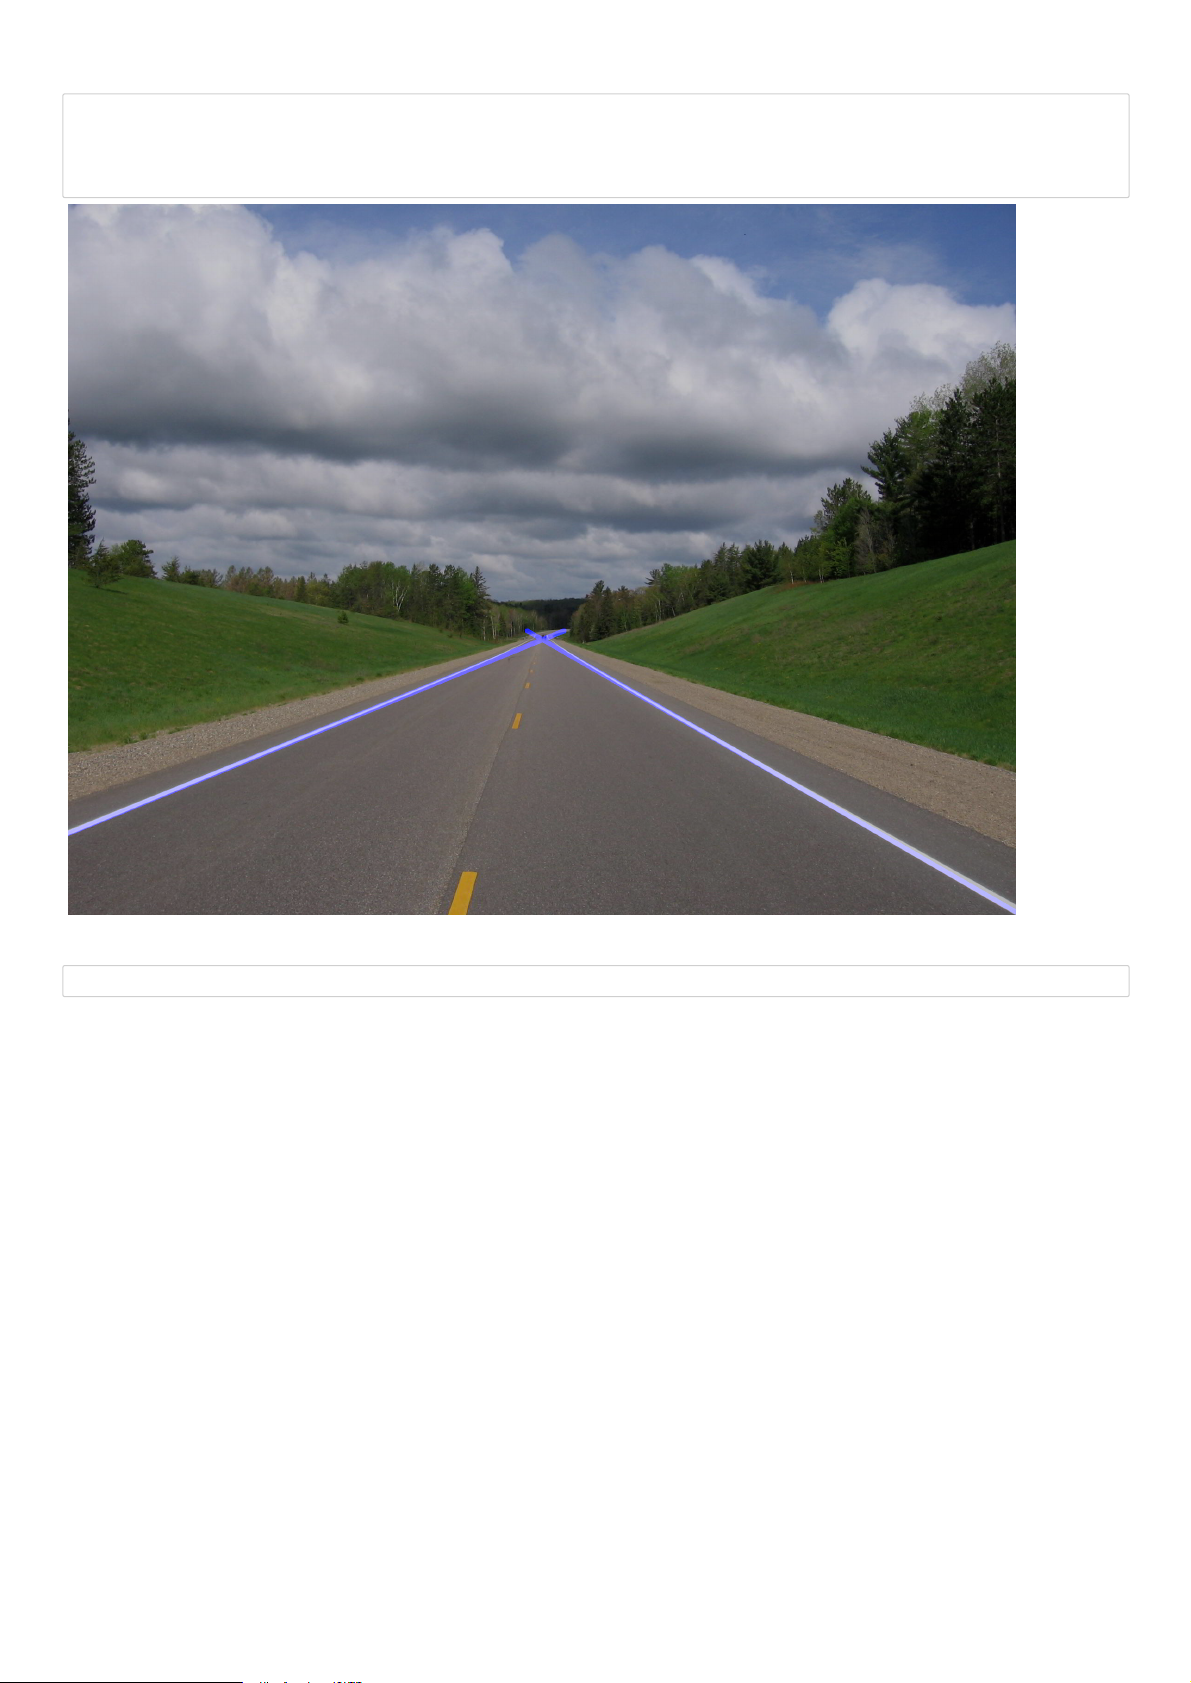

30/01/2023, 00:13

MS2022504_Laxminarayen_1a - Jupyter Notebook

localhost:8889/notebooks/Downloads/MS2022504_Laxminarayen_1a.ipynb

6/6

In\[20\]:

In\[\]:

lines <span class="ff4 fc4 ls0">=</span> cv2.HoughLinesP(mm, <span
class="fc6 ls0">2</span>, np.pi<span class="ff4 fc4 ls0">/</span><span
class="fc6 ws1">180</span>, <span class="fc6 ws1">100</span>,
np.array(\[\]), minLineLength<span class="ff4 fc4 ls0">=</span><span
class="fc6 ws1">40</span>, maxLineGap<span
class="ff4 fc4 ls0">=</span><span class="fc6 ws1">10</span>)

averaged_lines <span class="ff4 fc4 ls0">=</span>
average_slope_intercept(src1, lines)

line_image <span class="ff4 fc4 ls0">=</span> display_lines(src1,
averaged_lines)

combo_image <span class="ff4 fc4 ls0">=</span> cv2.addWeighted(src1,
<span class="fc6 ws1">0.8</span>, line_image, <span
class="fc6 ls0">1</span>, <span class="fc6 ls0">1</span>)

cv2_imshow(combo_image)

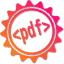